In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv("C:/Users/LJIN/Downloads/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploring basic info ##

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## checking null values ##

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Encoding data ##

In [16]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [21]:
df['Sex'] = np.where(df['Sex'] == 'male',0,1)

df['Embarked'] = np.where(df['Embarked'] == 'C', 0,
                                  np.where(df['Embarked'] == 'S', 1, 2))

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,B96 B98,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,G6,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,Unknown,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,Unknown,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,0


## standardized numerical data ##

In [35]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
standardized_df=scalar.fit_transform(df[['PassengerId','Survived','Pclass','SibSp','Fare','Age','Parch']])
df_new=pd.DataFrame(standardized_df)
df_new.columns=[['PassengerId','Survived','Pclass','SibSp','Fare','Age','Parch']]
df_new

,PassengerId,Survived,Pclass,SibSp,Fare,Age,Parch
0,-1.730108,-0.789272,0.827377,0.432793,-0.502445,-0.592481,-0.473674
1,-1.726220,1.266990,-1.566107,0.432793,0.786845,0.638789,-0.473674
2,-1.722332,1.266990,0.827377,-0.474545,-0.488854,-0.284663,-0.473674
3,-1.718444,1.266990,-1.566107,0.432793,0.420730,0.407926,-0.473674
4,-1.714556,-0.789272,0.827377,-0.474545,-0.486337,0.407926,-0.473674
...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.474545,-0.386671,-0.207709,-0.473674
887,1.718444,1.266990,-1.566107,-0.474545,-0.044381,-0.823344,-0.473674
888,1.722332,-0.789272,0.827377,0.432793,-0.176263,0.000000,2.008933
889,1.726220,1.266990,-1.566107,-0.474545,-0.044381,-0.284663,-0.473674


## outlier handling ##

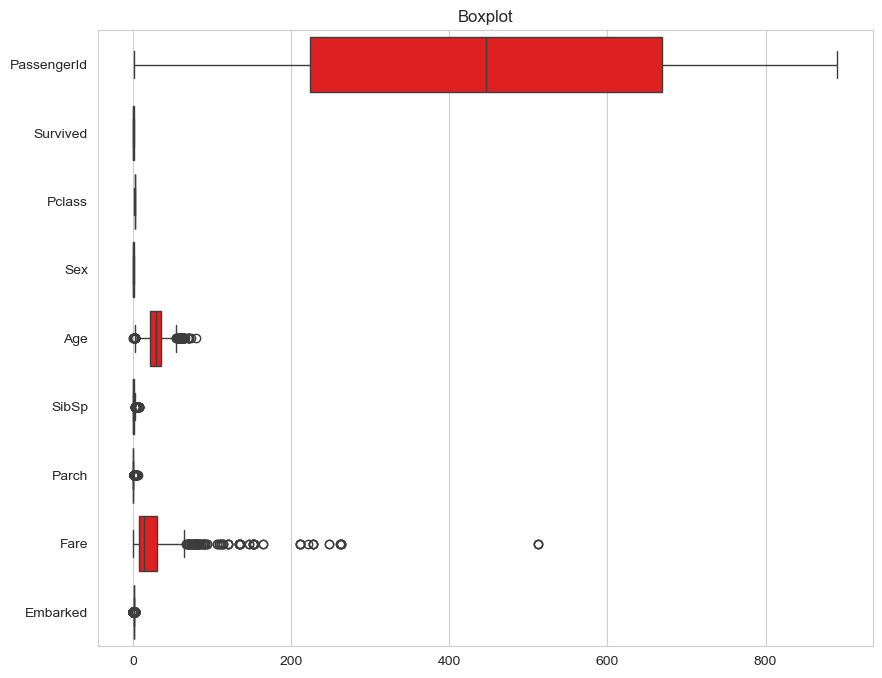

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.set_style(style='whitegrid')
sns.boxplot(data=df,orient="h",color="red")
plt.title("Boxplot")
plt.show()

In [37]:
df['PassengerId']=df_new['PassengerId']
df['Survived']=df_new['Survived']
df['Pclass']=df_new['Pclass']
df['SibSp']=df_new['SibSp']
df['Fare']=df_new['Fare']
df['Age']=df_new['Age']
df['Parch']=df_new['Parch']

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.730108,-0.789272,0.827377,"Braund, Mr. Owen Harris",0,-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,B96 B98,1
1,-1.726220,1.266990,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638789,0.432793,-0.473674,PC 17599,0.786845,C85,0
2,-1.722332,1.266990,0.827377,"Heikkinen, Miss. Laina",1,-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,G6,1
3,-1.718444,1.266990,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407926,0.432793,-0.473674,113803,0.420730,C123,1
4,-1.714556,-0.789272,0.827377,"Allen, Mr. William Henry",0,0.407926,-0.474545,-0.473674,373450,-0.486337,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,"Montvila, Rev. Juozas",0,-0.207709,-0.474545,-0.473674,211536,-0.386671,Unknown,1
887,1.718444,1.266990,-1.566107,"Graham, Miss. Margaret Edith",1,-0.823344,-0.474545,-0.473674,112053,-0.044381,B42,1
888,1.722332,-0.789272,0.827377,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.000000,0.432793,2.008933,W./C. 6607,-0.176263,Unknown,1
889,1.726220,1.266990,-1.566107,"Behr, Mr. Karl Howell",0,-0.284663,-0.474545,-0.473674,111369,-0.044381,C148,0


In [40]:
from IPython.display import FileLink

# Provide a clickable download link
FileLink('Titanic-Dataset-Processed.csv')


C:\Users\LJIN\Titanic-Dataset-Processed.csv